# Proyecto Alexis Vera

## Problema a resolver:
### Que areas en las provincias de Pichincha, Guayas y Azuay presentan mayor concentracion de SO2

## Objetivos:
### Describir el incremento o decremento de los niveles de SO2 en algunas provincias del Ecuador

### Importacion de librerias y paquetes

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/concentracion-aire/maate_concentracionso2_2021diciembre.csv


### Carga y lectura del dataset

In [20]:
df = pd.read_csv('/kaggle/input/concentracion-aire/maate_concentracionso2_2021diciembre.csv', delimiter=';', encoding='latin-1')
df_copy = df
df

,ANIO_REPORT,ANIO,CODMES,MES,DIA,COD_PROV,PROV,COD_CANT,CANT,COD_TIPO,TIPO,COD_EST,ESTACION,SO2
0,2021.0,2005,1,Enero,1,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,3,Belisario,"14,59"
1,2021.0,2005,1,Enero,2,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,3,Belisario,"15,07"
2,2021.0,2005,1,Enero,3,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,3,Belisario,"19,42"
3,2021.0,2005,1,Enero,4,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,3,Belisario,"19,79"
4,2021.0,2005,1,Enero,5,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,3,Belisario,"17,93"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35294,NaN,2018,12,Diciembre,27,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,8,Tumbaco,"1,54"
35295,NaN,2018,12,Diciembre,28,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,8,Tumbaco,"1,79"
35296,NaN,2018,12,Diciembre,29,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,8,Tumbaco,"2,17"
35297,NaN,2018,12,Diciembre,30,17,Pichincha,1701,Distrito Metropolitano de Quito,1,Automática,8,Tumbaco,"1,73"


In [21]:
#Mostrar el tipo de cada columna
print(df.dtypes)

ANIO_REPORT    float64
ANIO             int64
CODMES           int64
MES             object
DIA              int64
COD_PROV         int64
PROV            object
COD_CANT         int64
CANT            object
COD_TIPO         int64
TIPO            object
COD_EST          int64
ESTACION        object
SO2             object
dtype: object


In [22]:
#Convertir la columna S02 a numérica
df['SO2'] = df['SO2'].str.replace(',', '.')
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')
df['CANT'] = df['CANT'].str.replace('Distrito Metropolitano de Quito', 'DM Quito')


In [23]:
#Eliminar las columnas que no aportan
df = df.drop('ANIO_REPORT',axis=1)
df = df.drop('DIA',axis=1)
df = df.drop('COD_TIPO',axis=1)
df = df.drop('TIPO',axis=1)
df = df.drop('COD_EST',axis=1)
df = df.drop('ESTACION',axis=1)


In [29]:
#Previsualizar los datos
df

,ANIO,CODMES,MES,COD_PROV,PROV,COD_CANT,CANT,SO2
0,2005,1,Enero,17,Pichincha,1701,DM Quito,14.59
1,2005,1,Enero,17,Pichincha,1701,DM Quito,15.07
2,2005,1,Enero,17,Pichincha,1701,DM Quito,19.42
3,2005,1,Enero,17,Pichincha,1701,DM Quito,19.79
4,2005,1,Enero,17,Pichincha,1701,DM Quito,17.93
...,...,...,...,...,...,...,...,...
35294,2018,12,Diciembre,17,Pichincha,1701,DM Quito,1.54
35295,2018,12,Diciembre,17,Pichincha,1701,DM Quito,1.79
35296,2018,12,Diciembre,17,Pichincha,1701,DM Quito,2.17
35297,2018,12,Diciembre,17,Pichincha,1701,DM Quito,1.73


/tmp/ipykernel_32/278773174.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=0.8,square=True,cmap='OrRd',annot=True,annot_kws={"size":8})


<Axes: title={'center': 'Pearson'}>

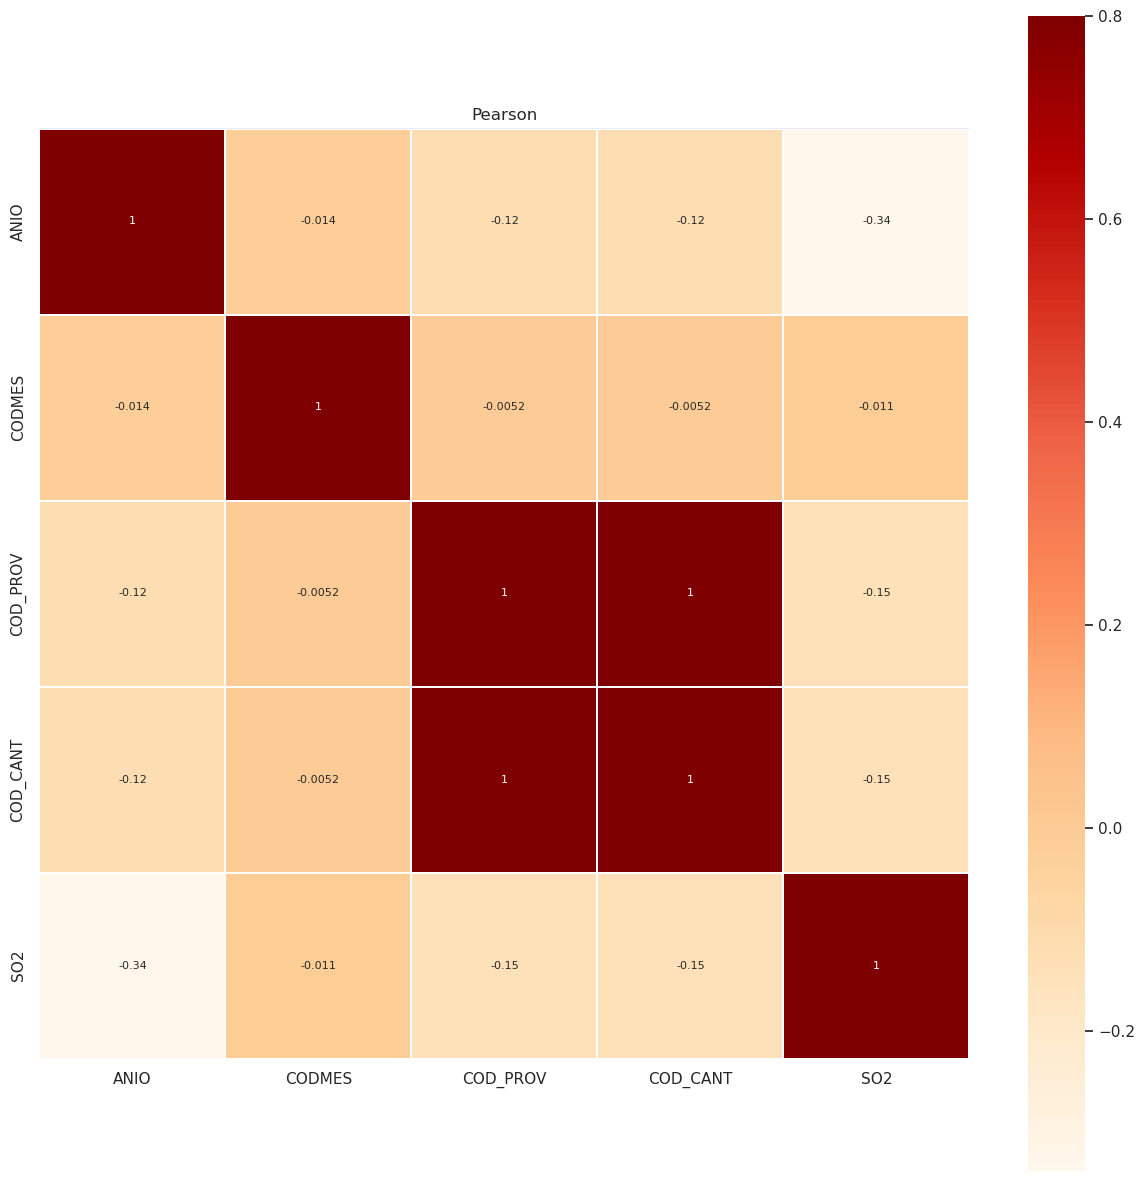

In [24]:
#Mapa de calor comparando las columnas entre si
sns.set(style='dark', palette='pastel', font='sans-serif', font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.8,square=True,cmap='OrRd',annot=True,annot_kws={"size":8})

/tmp/ipykernel_32/816198302.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'ANIO'}>,
        <Axes: title={'center': 'CODMES'}>],
       [<Axes: title={'center': 'COD_PROV'}>,
        <Axes: title={'center': 'COD_CANT'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: >]], dtype=object)

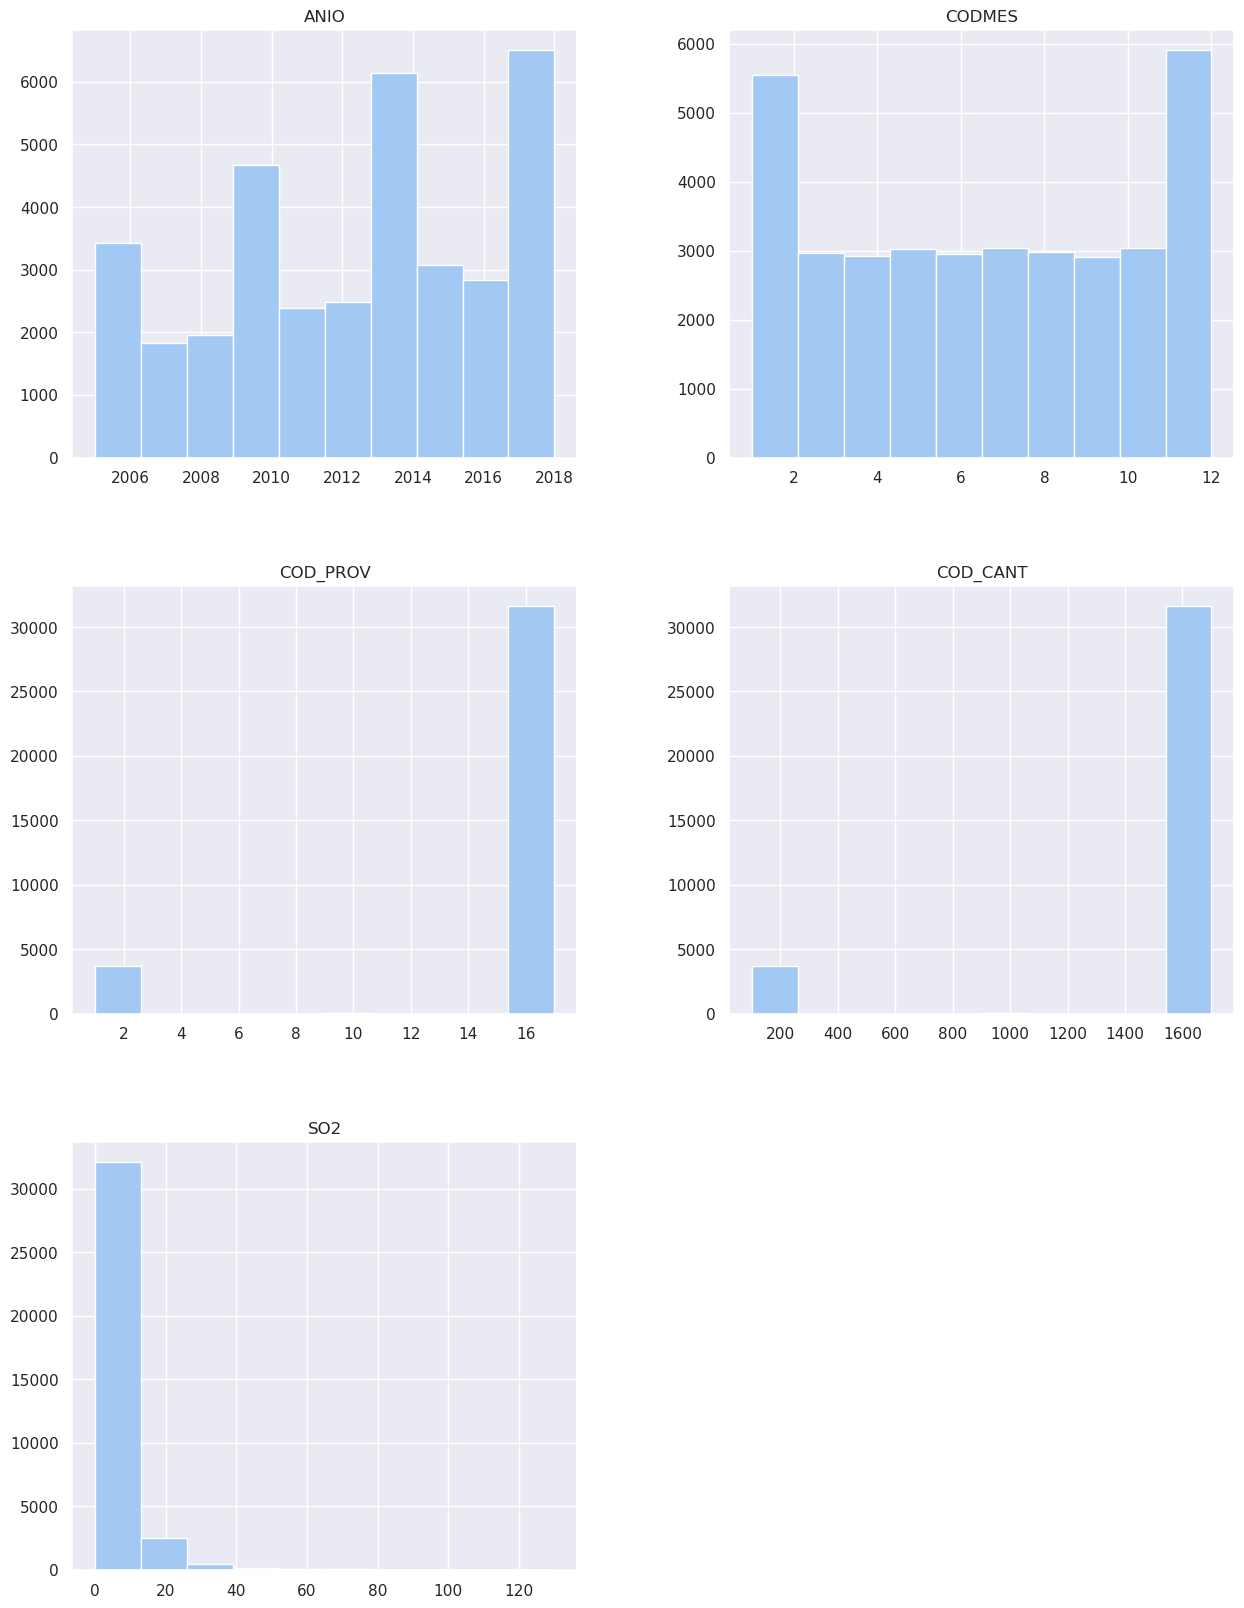

In [25]:
#Mostrar la distribucion de cada columna 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

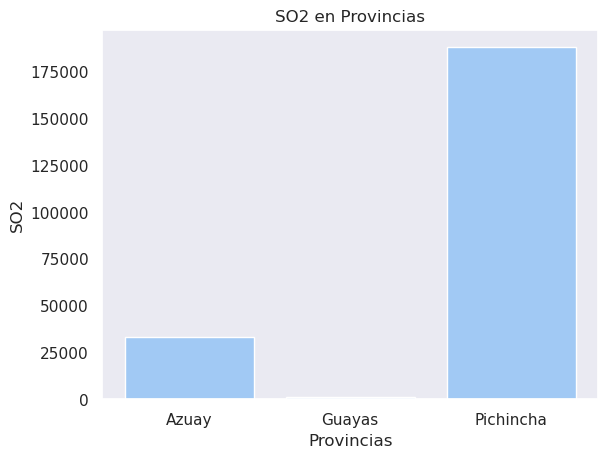

In [26]:
#Grafico comparando las provincias con los niveles de S02
data_prov = df.groupby('PROV')['SO2'].sum()
plt.bar(data_prov.index, data_prov.values)
plt.xlabel('Provincias')
plt.ylabel('SO2')
plt.title('SO2 en Provincias')
plt.show()

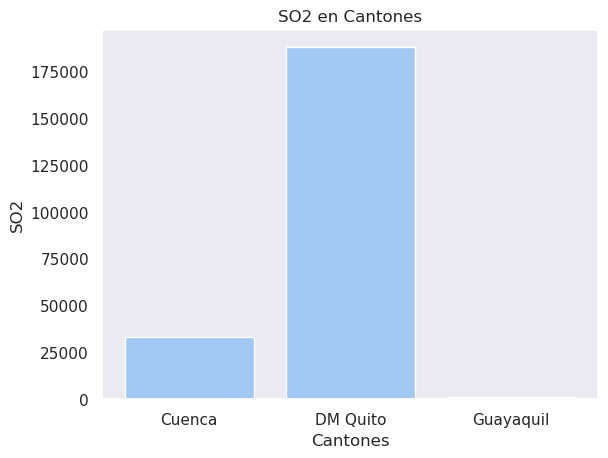

In [27]:
#Grafico comparando los cantones con los niveles de S02
data_cant = df.groupby('CANT')['SO2'].sum()
plt.bar(data_cant.index, data_cant.values)
plt.xlabel('Cantones')
plt.ylabel('SO2')
plt.title('SO2 en Cantones')
plt.show()


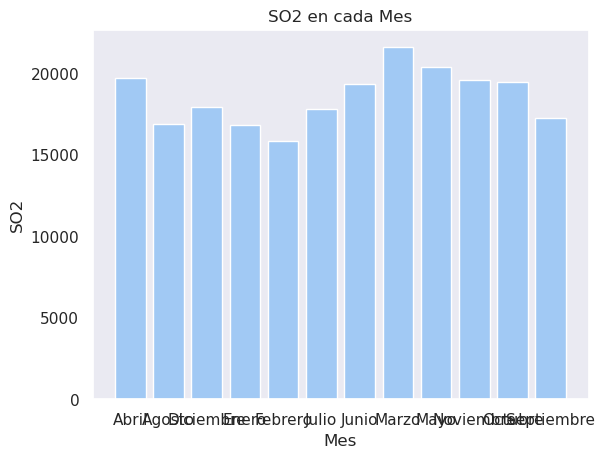

In [30]:
#Grafico comparando los meses con los niveles de S02
data_prov = df.groupby('MES')['SO2'].sum()
plt.bar(data_prov.index, data_prov.values)
plt.xlabel('Mes')
plt.ylabel('SO2')
plt.title('SO2 en cada Mes')
plt.show()